In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
df1 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv", encoding='latin1')
df2 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18_1400_NIC_FINAL_STATE_MANIPUR-2011.csv", encoding='latin1')
df3 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18_1500_NIC_FINAL_STATE_MIZORAM-2011.csv", encoding='latin1')
df4 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv", encoding='latin1')
df5 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv", encoding='latin1')
df6 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv", encoding='latin1')
df7 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv", encoding='latin1')
df8 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv", encoding='latin1')
df9 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv", encoding='latin1')
df10 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv", encoding='latin1')
df11 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_3000_NIC_FINAL_STATE_GOA-2011.csv", encoding='latin1')
df12 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_3200_NIC_FINAL_STATE_KERALA-2011.csv", encoding='latin1')
df13 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_3300_NIC_FINAL_STATE_TAMIL_NADU-2011.csv", encoding='latin1')
df14 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18sc_3400_NIC_FINAL_STATE_PUDUCHERRY-2011.csv", encoding='latin1')
df15 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18st_0200_NIC_FINAL_STATE_HIMACHAL_PRADESH-2011.csv", encoding='latin1')
df16 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18st_0500_NIC_FINAL_STATE_UTTARAKHAND-2011.csv", encoding='latin1')
df17 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18st_0900_NIC_FINAL_STATE_UTTAR_PRADESH-2011.csv", encoding='latin1')
df18 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18st_1000_NIC_FINAL_STATE_BIHAR-2011.csv", encoding='latin1')
df19 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18st_1100_NIC_FINAL_STATE_SIKKIM-2011.csv", encoding='latin1')
df20 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18st_1300_NIC_FINAL_STATE_NAGALAND-2011.csv", encoding='latin1')
df21 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18st_1800_NIC_FINAL_STATE_ASSAM-2011.csv", encoding='latin1')
df22 = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/xyz/States/Data/DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv", encoding='latin1')
     

In [115]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
df.head()
     

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0000,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136
3,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120


In [116]:
df.shape
df.to_csv("All_combaine.csv", index= False)

In [117]:
# remove unnec comma, semi colon,
df['State Code'] = df['State Code'].astype(str).str.replace('`', '').astype(int)
df['District Code'] = df['District Code'].astype(str).str.replace('`', '').astype(int)
df['Division'] = df['Division'].astype(str).str.replace('`', '').astype(int)
df['Group'] = df['Group'].astype(str).str.replace('`', '').astype(int)
df['Class'] = df['Class'].astype(str).str.replace('`', '').astype(int)
     

In [118]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [119]:
# remove spl char

def remove_sp_char(column_name):
    return ''.join(e for e in column_name if e.isalnum() or e in ('_', '.'))

df.columns = [remove_sp_char(col) for col in df.columns]

In [120]:
df.columns

Index(['StateCode', 'DistrictCode', 'IndiaStates', 'Division', 'Group',
       'Class', 'NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales'],
      dtype='object')

In [121]:
df.head()

,StateCode,DistrictCode,IndiaStates,Division,Group,Class,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
0,12,0,STATE - ARUNACHAL PRADESH,0,0,0,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,12,0,STATE - ARUNACHAL PRADESH,1,0,0,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,12,0,STATE - ARUNACHAL PRADESH,1,11,0,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136
3,12,0,STATE - ARUNACHAL PRADESH,1,11,111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,12,0,STATE - ARUNACHAL PRADESH,1,11,112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120


## EDA

In [122]:

non_numeric_columns =df.select_dtypes(exclude=[float, int]).columns

# Drop non-numeric columns from the DataFrame
numeric_df = df.drop(columns=non_numeric_columns)

# Calculate correlation
correlation_matrix = numeric_df.corr()
correlation_matrix
     

,StateCode,DistrictCode,Division,Group,Class,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
StateCode,1.000000,0.821516,-0.017720,0.000663,0.010305,0.003247,0.002310,0.006939,0.003631,0.002791,...,0.007091,0.001365,0.001834,0.000849,0.000361,0.000804,-0.000045,0.003140,0.003413,0.002670
DistrictCode,0.821516,1.000000,-0.011018,-0.003708,0.001240,-0.025432,-0.024757,-0.026326,-0.024929,-0.024174,...,-0.025927,-0.024923,-0.025441,-0.023271,-0.025170,-0.025490,-0.023671,-0.023378,-0.024412,-0.021019
Division,-0.017720,-0.011018,1.000000,0.741735,0.436059,-0.009560,-0.010098,-0.006562,-0.012919,-0.012337,...,0.000162,-0.008714,-0.010491,-0.006592,-0.011985,-0.012841,-0.010657,-0.002357,-0.006339,0.002322
Group,0.000663,-0.003708,0.741735,1.000000,0.592487,-0.013082,-0.013107,-0.011974,-0.015048,-0.014383,...,-0.007791,-0.012200,-0.013480,-0.010398,-0.014137,-0.014801,-0.012872,-0.008126,-0.010862,-0.004584
Class,0.010305,0.001240,0.436059,0.592487,1.000000,-0.009977,-0.009853,-0.009735,-0.010943,-0.010462,...,-0.007554,-0.009355,-0.010100,-0.008201,-0.010320,-0.010725,-0.009466,-0.007180,-0.008722,-0.005054
MainWorkersTotalPersons,0.003247,-0.025432,-0.009560,-0.013082,-0.009977,1.000000,0.996588,0.937795,0.981714,0.980408,...,0.932173,0.931405,0.961451,0.859283,0.914138,0.938649,0.848465,0.921996,0.962046,0.829827
MainWorkersTotalMales,0.002310,-0.024757,-0.010098,-0.013107,-0.009853,0.996588,1.000000,0.905941,0.975657,0.982359,...,0.904682,0.917042,0.959877,0.833207,0.899160,0.937208,0.822364,0.909387,0.960320,0.805386
MainWorkersTotalFemales,0.006939,-0.026326,-0.006562,-0.011974,-0.009735,0.937795,0.905941,1.000000,0.932036,0.897145,...,0.976456,0.920523,0.894465,0.903191,0.907164,0.872853,0.893307,0.904454,0.895658,0.869113
MainWorkersRuralPersons,0.003631,-0.024929,-0.012919,-0.015048,-0.010943,0.981714,0.975657,0.932036,1.000000,0.994513,...,0.893432,0.944295,0.969600,0.876163,0.945367,0.967474,0.880287,0.900821,0.936797,0.814381
MainWorkersRuralMales,0.002791,-0.024174,-0.012337,-0.014383,-0.010462,0.980408,0.982359,0.897145,0.994513,1.000000,...,0.869580,0.929435,0.971920,0.845367,0.928003,0.969499,0.846795,0.891188,0.939501,0.791103


In [123]:
def correlation_matrix():
    numberic_df = df.select_dtypes(include=['float64','int64'])

    plt.figure(figsize=(12,10))
    sns.heatmap(numberic_df.corr(), annot=True,cmap='coolwarm', fmt='.2f')
    plt.title('correlation Matrix')
    plt.show()


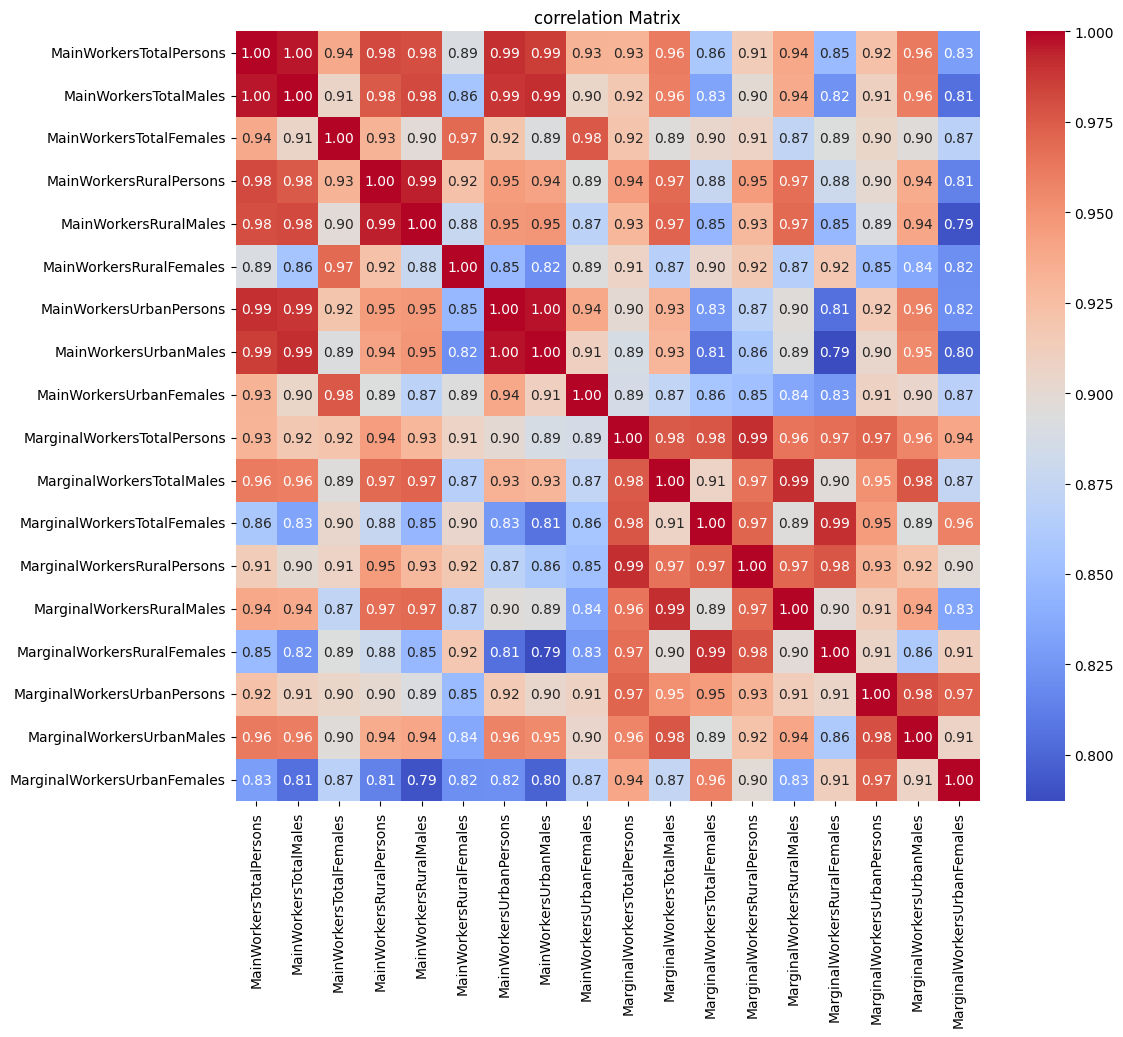

In [124]:
correlation_matrix()


In [126]:
df.shape


(173483, 25)

In [127]:
df.head()

,StateCode,DistrictCode,IndiaStates,Division,Group,Class,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
0,12,0,STATE - ARUNACHAL PRADESH,0,0,0,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,12,0,STATE - ARUNACHAL PRADESH,1,0,0,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,12,0,STATE - ARUNACHAL PRADESH,1,11,0,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136
3,12,0,STATE - ARUNACHAL PRADESH,1,11,111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,12,0,STATE - ARUNACHAL PRADESH,1,11,112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120


In [128]:
#null value
df.isna().sum()


StateCode                      0
DistrictCode                   0
IndiaStates                    0
Division                       0
Group                          0
Class                          0
NICName                        0
MainWorkersTotalPersons        0
MainWorkersTotalMales          0
MainWorkersTotalFemales        0
MainWorkersRuralPersons        0
MainWorkersRuralMales          0
MainWorkersRuralFemales        0
MainWorkersUrbanPersons        0
MainWorkersUrbanMales          0
MainWorkersUrbanFemales        0
MarginalWorkersTotalPersons    0
MarginalWorkersTotalMales      0
MarginalWorkersTotalFemales    0
MarginalWorkersRuralPersons    0
MarginalWorkersRuralMales      0
MarginalWorkersRuralFemales    0
MarginalWorkersUrbanPersons    0
MarginalWorkersUrbanMales      0
MarginalWorkersUrbanFemales    0
dtype: int64

In [129]:
df.describe()

,StateCode,DistrictCode,Division,Group,Class,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
count,173483.000000,173483.000000,173483.000000,173483.000000,173483.000000,1.734830e+05,1.734830e+05,1.734830e+05,1.734830e+05,1.734830e+05,...,1.734830e+05,1.734830e+05,1.734830e+05,1.734830e+05,1.734830e+05,1.734830e+05,1.734830e+05,1.734830e+05,173483.000000,173483.000000
mean,20.574056,359.842486,46.693417,388.849063,2280.241822,1.262600e+03,9.919329e+02,2.706671e+02,5.369979e+02,4.125967e+02,...,1.462659e+02,3.033318e+02,1.571638e+02,1.461679e+02,1.972771e+02,9.651694e+01,1.007602e+02,1.060547e+02,60.646911,45.407746
std,8.644865,190.663576,28.845122,314.130817,3060.875658,4.239214e+04,3.476144e+04,8.263317e+03,1.826826e+04,1.467518e+04,...,4.508572e+03,1.074724e+04,5.412304e+03,5.593475e+03,7.054730e+03,3.379714e+03,3.861839e+03,3.862316e+03,2111.433292,1843.448959
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,13.000000,246.000000,23.000000,102.000000,0.000000,6.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,20.000000,349.000000,46.000000,370.000000,0.000000,2.400000e+01,1.800000e+01,2.000000e+00,8.000000e+00,6.000000e+00,...,0.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,29.000000,525.000000,70.000000,631.000000,4659.000000,1.500000e+02,1.140000e+02,2.100000e+01,5.800000e+01,4.400000e+01,...,1.000000e+01,2.300000e+01,1.500000e+01,6.000000e+00,1.200000e+01,6.000000e+00,2.000000e+00,8.000000e+00,6.000000,2.000000
max,34.000000,637.000000,99.000000,992.000000,9920.000000,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,...,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StateCode,173483.0,20.574056,8.644865,2.0,13.0,20.0,29.0,34.0
DistrictCode,173483.0,359.842486,190.663576,0.0,246.0,349.0,525.0,637.0
Division,173483.0,46.693417,28.845122,0.0,23.0,46.0,70.0,99.0
Group,173483.0,388.849063,314.130817,0.0,102.0,370.0,631.0,992.0
Class,173483.0,2280.241822,3060.875658,0.0,0.0,0.0,4659.0,9920.0
MainWorkersTotalPersons,173483.0,1262.599932,42392.143848,0.0,6.0,24.0,150.0,15619759.0
MainWorkersTotalMales,173483.0,991.932858,34761.440400,0.0,4.0,18.0,114.0,12801403.0
MainWorkersTotalFemales,173483.0,270.667074,8263.317452,0.0,0.0,2.0,21.0,2818356.0
MainWorkersRuralPersons,173483.0,536.997861,18268.256181,0.0,1.0,8.0,58.0,6770444.0
MainWorkersRuralMales,173483.0,412.596692,14675.179274,0.0,0.0,6.0,44.0,5446541.0


In [131]:
df.nunique()

StateCode                        22
DistrictCode                    439
IndiaStates                     458
Division                         89
Group                           241
Class                           423
NICName                         587
MainWorkersTotalPersons        7405
MainWorkersTotalMales          6615
MainWorkersTotalFemales        3517
MainWorkersRuralPersons        4891
MainWorkersRuralMales          4397
MainWorkersRuralFemales        2352
MainWorkersUrbanPersons        5665
MainWorkersUrbanMales          5112
MainWorkersUrbanFemales        2658
MarginalWorkersTotalPersons    3640
MarginalWorkersTotalMales      2777
MarginalWorkersTotalFemales    2421
MarginalWorkersRuralPersons    2916
MarginalWorkersRuralMales      2209
MarginalWorkersRuralFemales    1975
MarginalWorkersUrbanPersons    2174
MarginalWorkersUrbanMales      1747
MarginalWorkersUrbanFemales    1368
dtype: int64

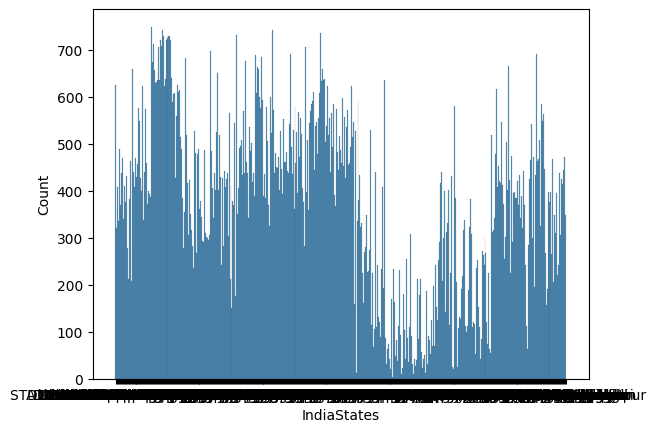

In [133]:
sns.histplot(x = 'IndiaStates', data = df, )
plt.show()

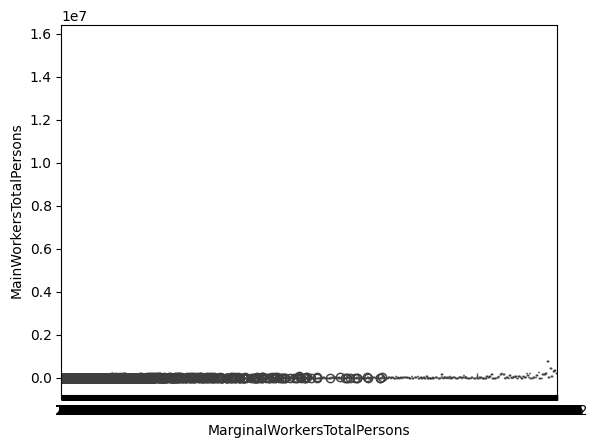

In [134]:
x_var = "MarginalWorkersTotalPersons"
y_var = "MainWorkersTotalPersons"
sns.boxplot(x = x_var, y = y_var, data = df)
plt.show()

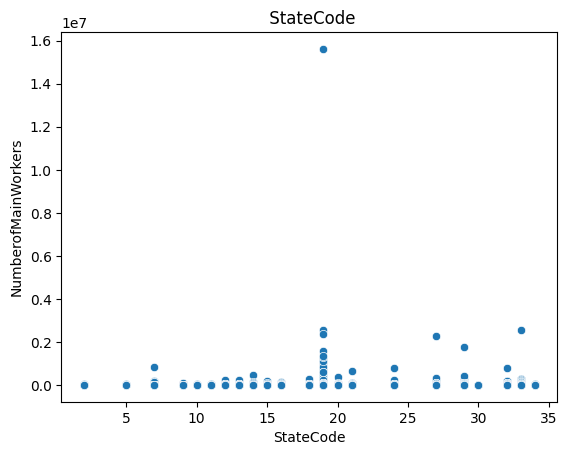

In [135]:
y_var = "MainWorkersTotalPersons".strip()
sns.scatterplot(x = 'StateCode', y = y_var, data = df)
plt.xlabel('StateCode')
plt.ylabel('NumberofMainWorkers')
plt.title(' StateCode')
plt.show()

c:\Users\HP\OneDrive\Desktop\xyz\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


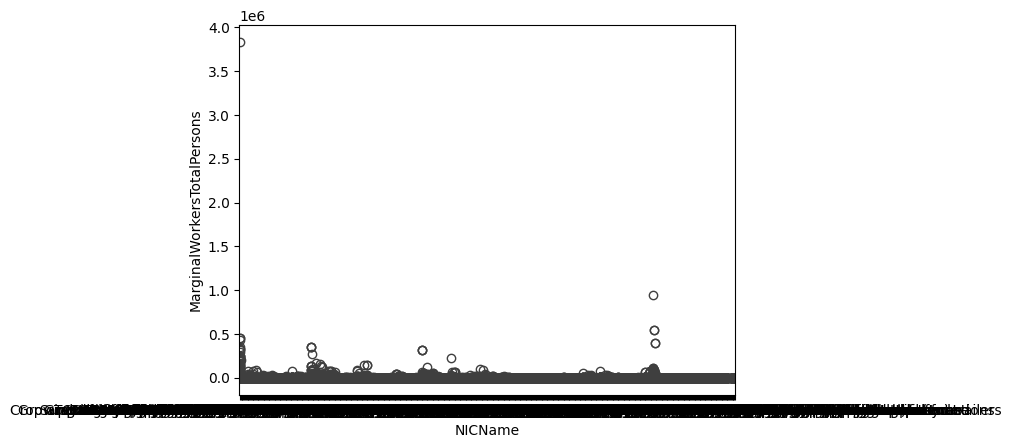

In [136]:
sns.boxplot( x = "NICName", y = 'MarginalWorkersTotalPersons', data = df)
plt.show()
     

## Data Cleaning Process

In [137]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
12042    False
12043    False
12044    False
12045    False
12046    False
Length: 173483, dtype: bool

In [139]:
df.dtypes

StateCode                       int32
DistrictCode                    int32
IndiaStates                    object
Division                        int32
Group                           int32
Class                           int32
NICName                        object
MainWorkersTotalPersons         int64
MainWorkersTotalMales           int64
MainWorkersTotalFemales         int64
MainWorkersRuralPersons         int64
MainWorkersRuralMales           int64
MainWorkersRuralFemales         int64
MainWorkersUrbanPersons         int64
MainWorkersUrbanMales           int64
MainWorkersUrbanFemales         int64
MarginalWorkersTotalPersons     int64
MarginalWorkersTotalMales       int64
MarginalWorkersTotalFemales     int64
MarginalWorkersRuralPersons     int64
MarginalWorkersRuralMales       int64
MarginalWorkersRuralFemales     int64
MarginalWorkersUrbanPersons     int64
MarginalWorkersUrbanMales       int64
MarginalWorkersUrbanFemales     int64
dtype: object

In [140]:
# Drop un nec cols
columns_to_drop = ["StateCode", "DistrictCode", "Division", "Group", "Class"]
df = df.drop(columns=columns_to_drop)

In [141]:
df.columns
     

Index(['IndiaStates', 'NICName', 'MainWorkersTotalPersons',
       'MainWorkersTotalMales', 'MainWorkersTotalFemales',
       'MainWorkersRuralPersons', 'MainWorkersRuralMales',
       'MainWorkersRuralFemales', 'MainWorkersUrbanPersons',
       'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
       'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales',
       'MarginalWorkersTotalFemales', 'MarginalWorkersRuralPersons',
       'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
       'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales',
       'MarginalWorkersUrbanFemales'],
      dtype='object')

In [143]:

# Extract 'State' and 'District' from 'India/States' column
df[['State', 'District']] = df['IndiaStates'].str.extract(r'STATE - (\w+)|District - (\w+)', expand=True)
df = df.drop('IndiaStates', axis=1)

In [144]:
df[['State', 'District']].isnull().sum()

State       159516
District     13967
dtype: int64

In [145]:
# Fill NaN values in 'State' column with forward fill (ffill)
df['State'] = df['State'].ffill()
df['District'] = df['District'].bfill()

In [146]:
df[['State', 'District']].isnull().sum()

State       0
District    0
dtype: int64

In [172]:

# Example: Creating a new 'TotalWorkers' column by summing 'MainWorkersTotalPersons' and 'MarginalWorkersTotalPersons'
df['TotalWorkers'] = df['MainWorkersTotalPersons'] + df['MarginalWorkersTotalPersons']
df['MaleFemaleRatio'] = df['MainWorkersTotalMales'] / (df['MainWorkersTotalFemales'].replace(0, 1))
    

In [148]:
df[['TotalWorkers', 'MaleFemaleRatio']].isnull().sum()

TotalWorkers       0
MaleFemaleRatio    0
dtype: int64

In [173]:
df['TotalPopulation'] = df['MainWorkersTotalPersons'] + df['MarginalWorkersTotalPersons']
df['WorkersRatio'] = df['TotalWorkers'] / df['TotalPopulation']

In [175]:
df[['TotalPopulation', 'WorkersRatio']].isnull().sum()
     

TotalPopulation    0
WorkersRatio       0
dtype: int64

In [176]:
df[['TotalPopulation', 'WorkersRatio']] = df[['TotalPopulation', 'WorkersRatio']].astype(int)
     

## final DF

In [177]:
df.to_csv("HRM.csv", index = False)

## Geo MAP

In [178]:
file_path = r'C:/Users/HP/OneDrive/Desktop/xyz/lat_long.csv'

df_geo = pd.read_csv(file_path)

In [179]:
df_geo.nunique()

Unnamed: 0    33
State.Name    33
latitude      33
longitude     32
dtype: int64

In [180]:
# Drop the specified columns
df_geo = df_geo.drop(['Unnamed: 0', 'State.Name'], axis=1)

In [181]:
# Concatenate the two DataFrames horizontally (along columns) based on their index
df_1 = pd.concat([df, df_geo[['latitude', 'longitude']]], axis=1)

In [182]:
df_1.head()


,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude
0,Total,211353,160166,51187,114667,85612,29055,96686,74554,22132,...,7166,6668,ARUNACHAL,Tawang,249768,3.129037,249768,1,11.667026,92.735983
1,"Crop and animal production, hunting and relate...",12967,8180,4787,10821,6770,4051,2146,1410,736,...,207,223,ARUNACHAL,Tawang,15942,1.708795,15942,1,14.750429,78.570026
2,Growing of non-perennial crops,2373,1352,1021,1482,824,658,891,528,363,...,122,136,ARUNACHAL,Tawang,3537,1.324192,3537,1,27.100399,93.616601
3,"Growing of cereals (except rice), leguminous c...",171,98,73,131,81,50,40,17,23,...,2,1,ARUNACHAL,Tawang,204,1.342466,204,1,26.749981,94.216667
4,Growing of rice,1944,1106,838,1207,656,551,737,450,287,...,105,120,ARUNACHAL,Tawang,2949,1.319809,2949,1,25.785414,87.479973


In [183]:
df_1.columns


Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude'],
      dtype='object')

In [184]:
df_1[['latitude', 'longitude', ]].isnull().sum()

latitude     172757
longitude    172757
dtype: int64

In [185]:
df_1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12042    False
12043    False
12044     True
12045    False
12046     True
Length: 173483, dtype: bool

In [164]:
df_1.columns


Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'latitude', 'longitude'],
      dtype='object')

In [186]:
# Calculate the mean of the 'Latitude' and 'Longitude' columns
mean_latitude = df_1['latitude'].mean()
mean_longitude = df_1['longitude'].mean()

# Fill the missing values with their respective mean values
df_1.loc[:, 'latitude'] = df_1['latitude'].fillna(mean_latitude)
df_1.loc[:, 'longitude'] = df_1['longitude'].fillna(mean_longitude)
     


In [187]:
df_1[['latitude', 'longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

## Outlieres find

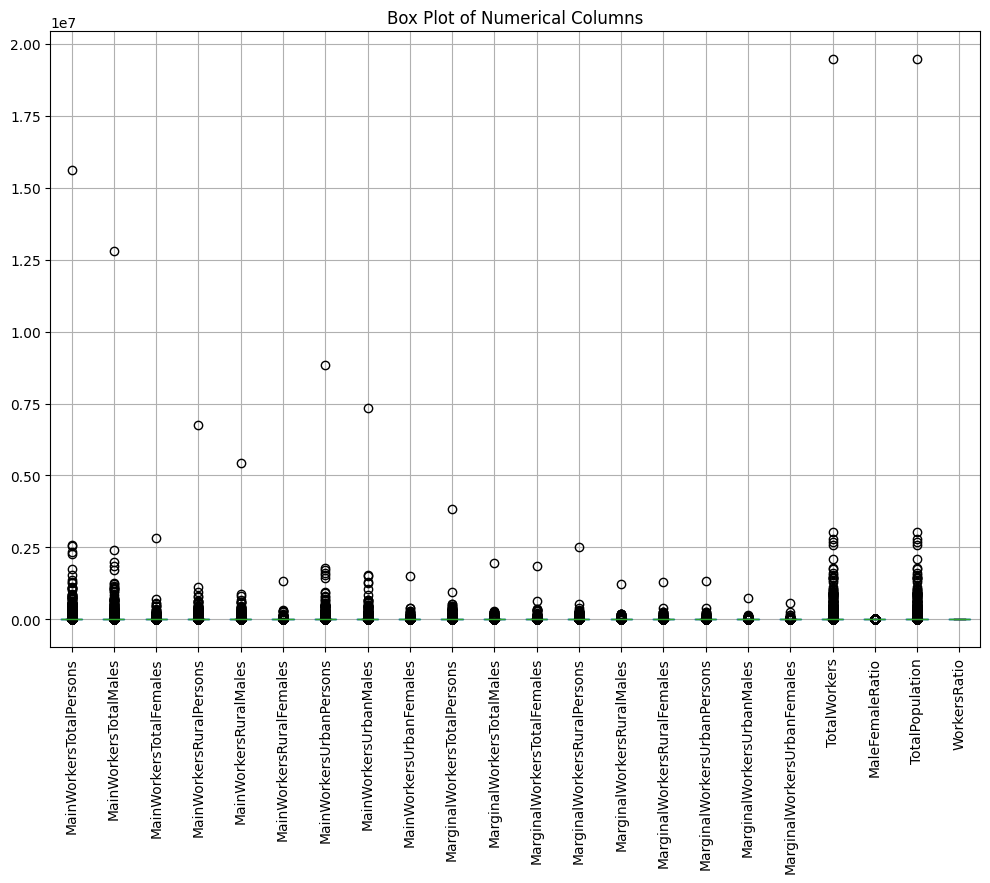

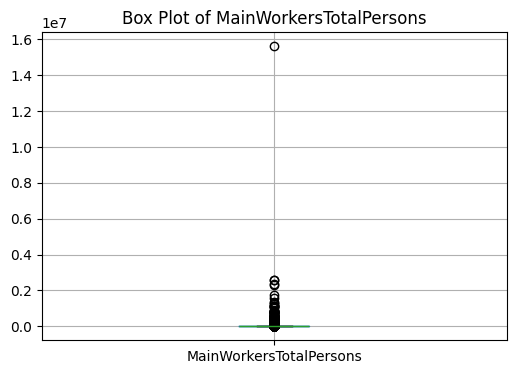

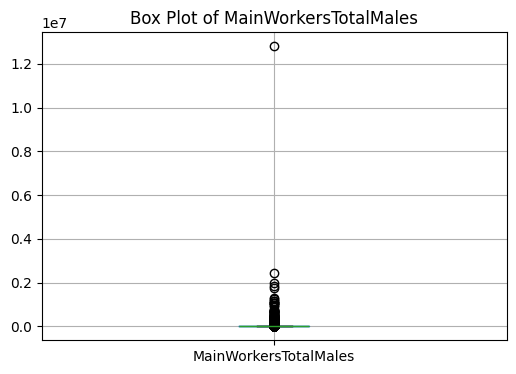

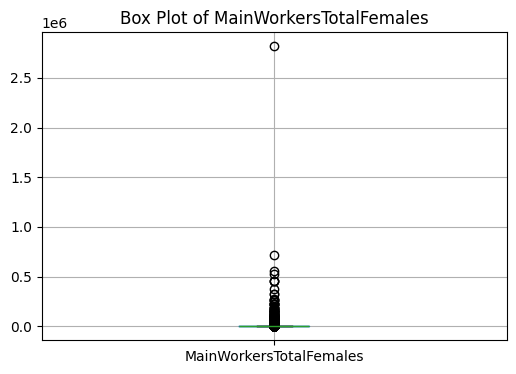

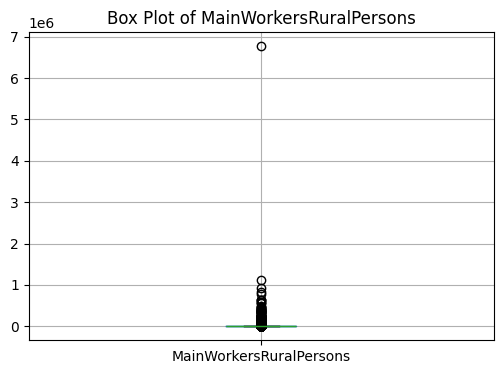

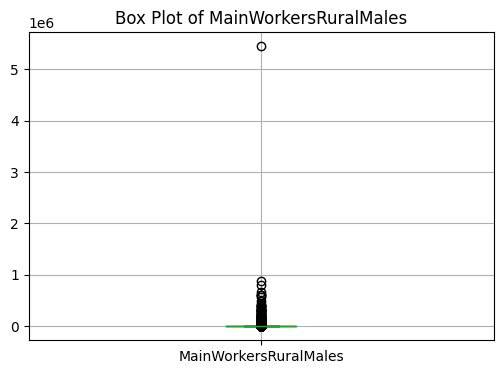

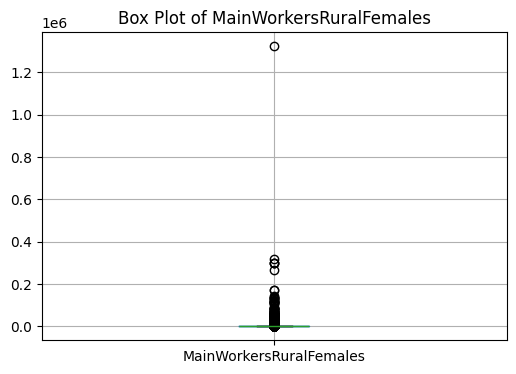

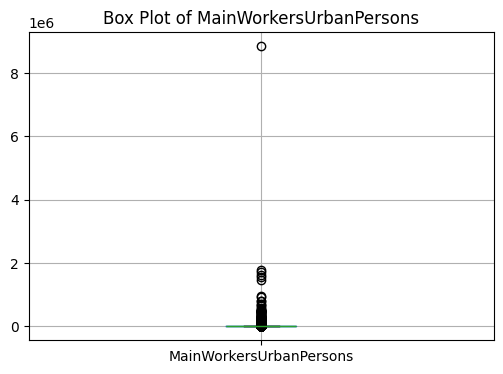

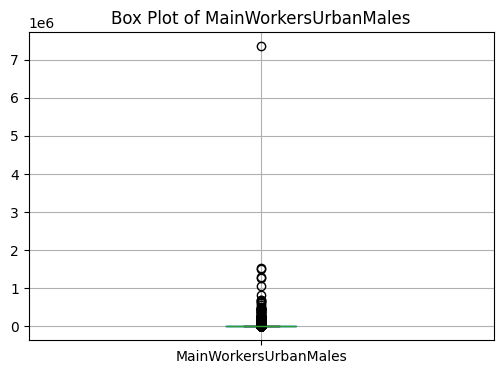

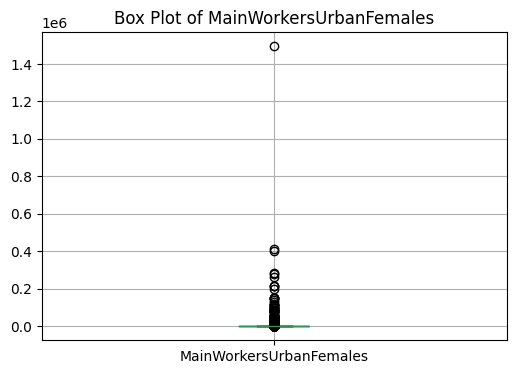

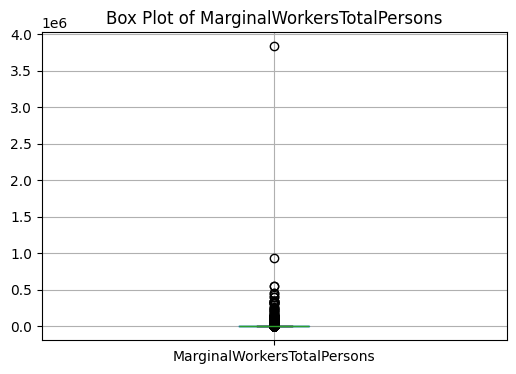

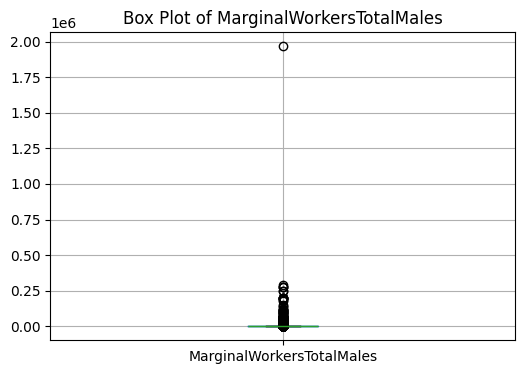

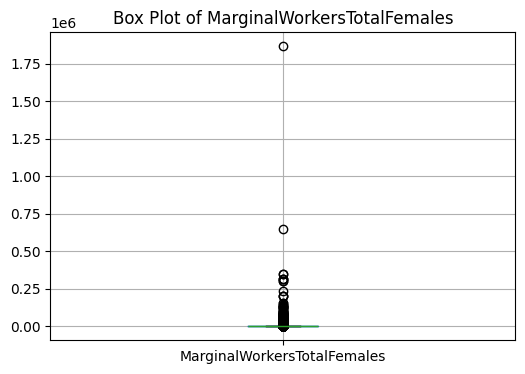

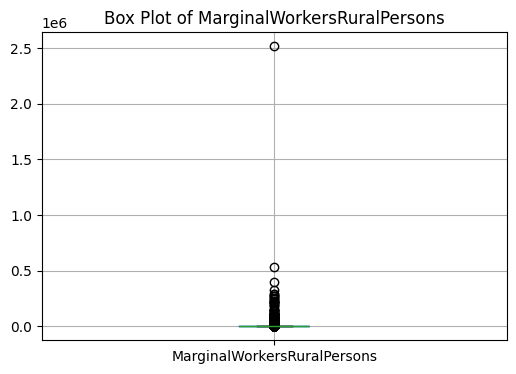

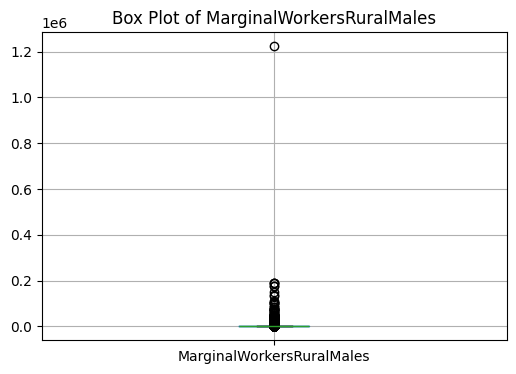

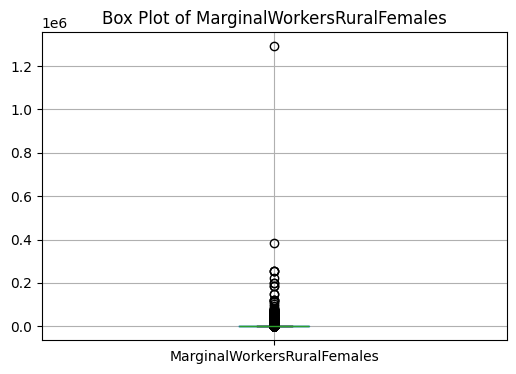

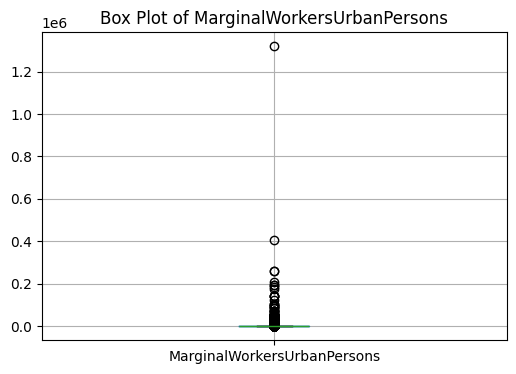

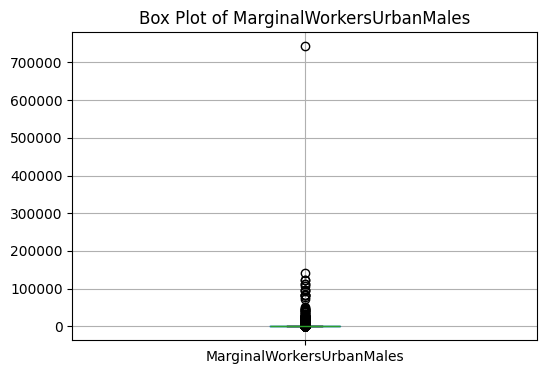

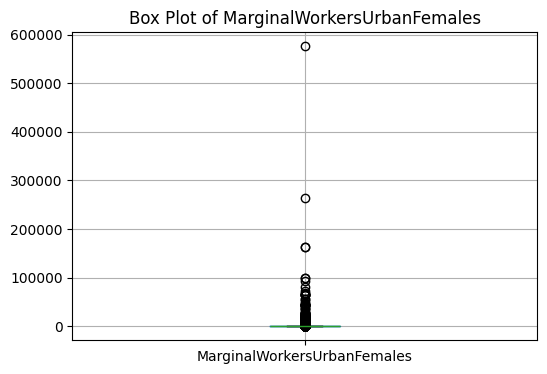

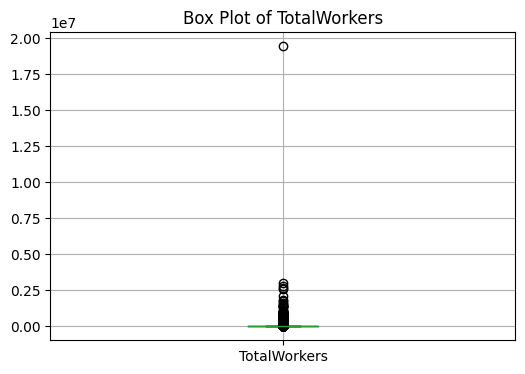

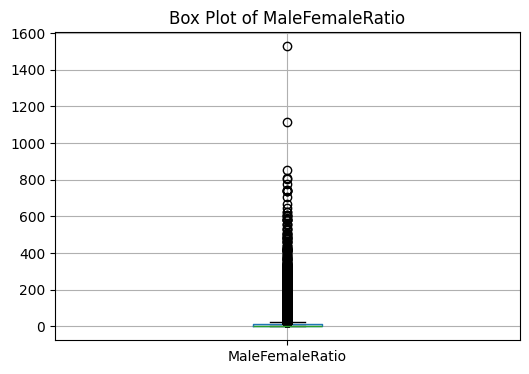

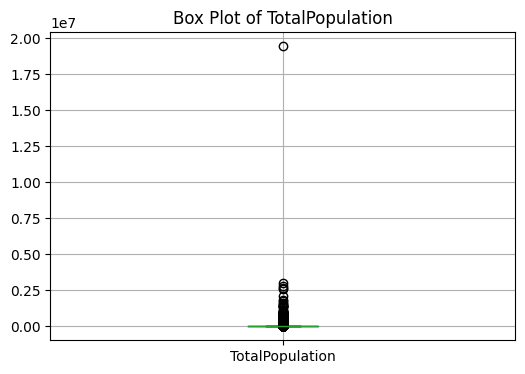

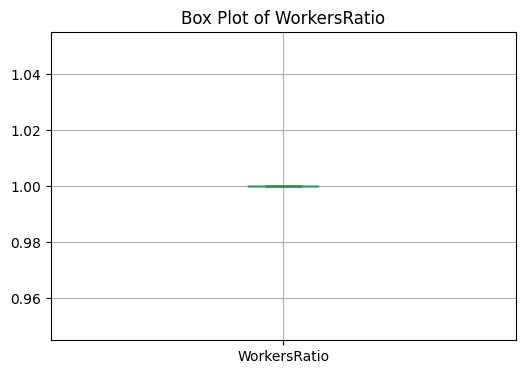

In [188]:
# Select only the numerical columns for outlier detection
numerical_columns = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation', 'WorkersRatio']

# Calculate outliers using Z-score
z_scores =df_1[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Plot Box Plots to visualize the distribution and outliers
plt.figure(figsize=(12, 8))
df_1[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=90)
plt.show()

# Plot Box Plots separately for each numerical column to focus on individual distributions
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    df_1[[column]].boxplot()
    plt.title(f"Box Plot of {column}")
    plt.show()
     

## Remove Outliers

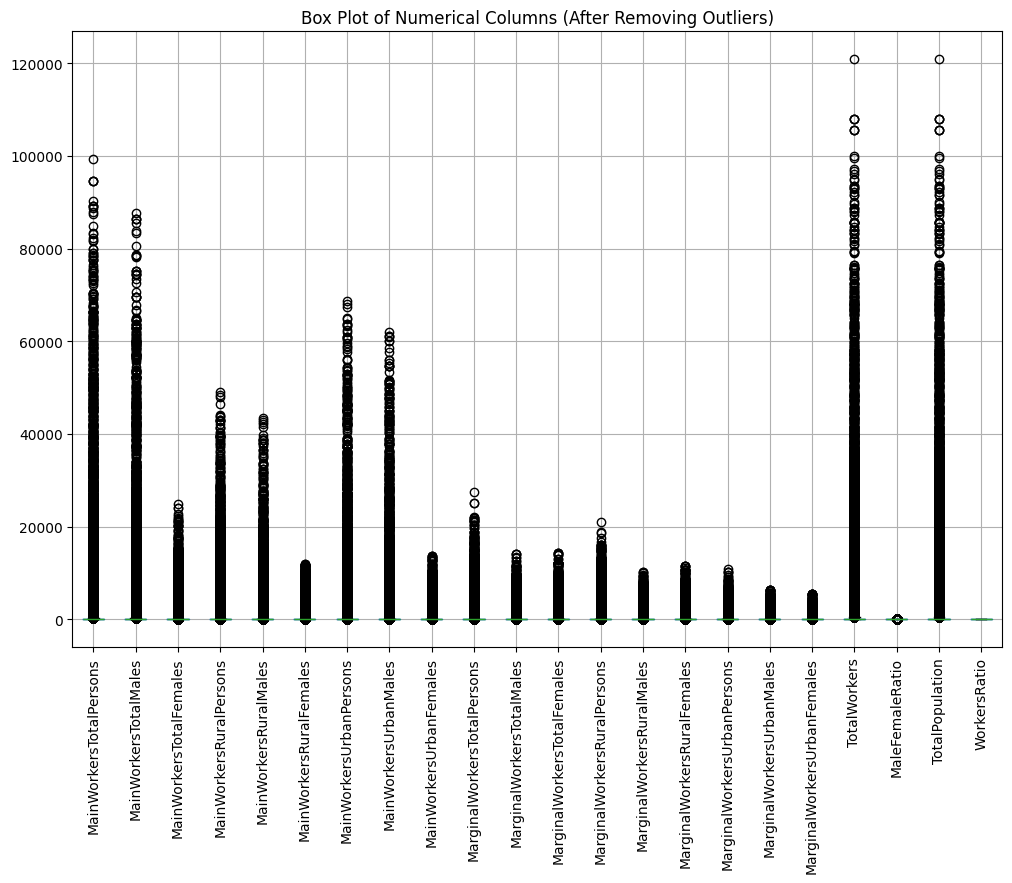

In [189]:
# Select only the numerical columns for outlier detection
numerical_columns = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation', 'WorkersRatio']
# Calculate Z-scores for each numerical column
z_scores = df_1[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove rows with outliers in any numerical column
df_1_no_outliers = df_1[~outliers.any(axis=1)]

# Visualize the distribution of cleaned data with Box Plots
plt.figure(figsize=(12, 8))
df_1_no_outliers = df_1[~outliers.any(axis=1)]
df_1_no_outliers[numerical_columns].boxplot()  # Removed the square brackets here
plt.title("Box Plot of Numerical Columns (After Removing Outliers)")
plt.xticks(rotation=90)
plt.show()

In [190]:
df_1.shape

(173483, 27)

In [191]:
df_1['District']

0            Tawang
1            Tawang
2            Tawang
3            Tawang
4            Tawang
            ...    
12042    Malkangiri
12043    Malkangiri
12044    Malkangiri
12045    Malkangiri
12046    Malkangiri
Name: District, Length: 173483, dtype: object

In [193]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173483 entries, 0 to 12046
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NICName                      173483 non-null  object 
 1   MainWorkersTotalPersons      173483 non-null  int64  
 2   MainWorkersTotalMales        173483 non-null  int64  
 3   MainWorkersTotalFemales      173483 non-null  int64  
 4   MainWorkersRuralPersons      173483 non-null  int64  
 5   MainWorkersRuralMales        173483 non-null  int64  
 6   MainWorkersRuralFemales      173483 non-null  int64  
 7   MainWorkersUrbanPersons      173483 non-null  int64  
 8   MainWorkersUrbanMales        173483 non-null  int64  
 9   MainWorkersUrbanFemales      173483 non-null  int64  
 10  MarginalWorkersTotalPersons  173483 non-null  int64  
 11  MarginalWorkersTotalMales    173483 non-null  int64  
 12  MarginalWorkersTotalFemales  173483 non-null  int64  
 13  Margi

In [194]:
df_1.nunique()

NICName                          587
MainWorkersTotalPersons         7405
MainWorkersTotalMales           6615
MainWorkersTotalFemales         3517
MainWorkersRuralPersons         4891
MainWorkersRuralMales           4397
MainWorkersRuralFemales         2352
MainWorkersUrbanPersons         5665
MainWorkersUrbanMales           5112
MainWorkersUrbanFemales         2658
MarginalWorkersTotalPersons     3640
MarginalWorkersTotalMales       2777
MarginalWorkersTotalFemales     2421
MarginalWorkersRuralPersons     2916
MarginalWorkersRuralMales       2209
MarginalWorkersRuralFemales     1975
MarginalWorkersUrbanPersons     2174
MarginalWorkersUrbanMales       1747
MarginalWorkersUrbanFemales     1368
State                             22
District                         408
TotalWorkers                    8069
MaleFemaleRatio                25430
TotalPopulation                 8069
WorkersRatio                       1
latitude                          34
longitude                         33
d

In [195]:
df_1.to_csv("newdf.csv", index = False)
     

## NLP

In [197]:
# new df_1
df_2 = pd.read_csv("C:/Users/HP/OneDrive/Desktop/xyz/newdf.csv")
df_2.head(2)
     

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude
0,Total,211353,160166,51187,114667,85612,29055,96686,74554,22132,...,7166,6668,ARUNACHAL,Tawang,249768,3.129037,249768,1,11.667026,92.735983
1,"Crop and animal production, hunting and relate...",12967,8180,4787,10821,6770,4051,2146,1410,736,...,207,223,ARUNACHAL,Tawang,15942,1.708795,15942,1,14.750429,78.570026


In [198]:

df_2.columns.tolist()

['NICName',
 'MainWorkersTotalPersons',
 'MainWorkersTotalMales',
 'MainWorkersTotalFemales',
 'MainWorkersRuralPersons',
 'MainWorkersRuralMales',
 'MainWorkersRuralFemales',
 'MainWorkersUrbanPersons',
 'MainWorkersUrbanMales',
 'MainWorkersUrbanFemales',
 'MarginalWorkersTotalPersons',
 'MarginalWorkersTotalMales',
 'MarginalWorkersTotalFemales',
 'MarginalWorkersRuralPersons',
 'MarginalWorkersRuralMales',
 'MarginalWorkersRuralFemales',
 'MarginalWorkersUrbanPersons',
 'MarginalWorkersUrbanMales',
 'MarginalWorkersUrbanFemales',
 'State',
 'District',
 'TotalWorkers',
 'MaleFemaleRatio',
 'TotalPopulation',
 'WorkersRatio',
 'latitude',
 'longitude']

In [199]:
df_2['NICName'].unique()

array(['Total',
       'Crop and animal production, hunting and related service activities',
       'Growing of non-perennial crops',
       'Growing of cereals (except rice), leguminous crops and oil seeds',
       'Growing of rice',
       'Growing of vegetables and melons, roots and tubers',
       'Growing of sugar cane', 'Growing of tobacco',
       'Growing of other non-perennial crop',
       'Growing of perennial crops',
       'Growing of tropical and subtropical fruits',
       'Growing of citrus fruits',
       'Growing of pome fruits and stone fruits',
       'Growing of other tree and bush fruits and nuts',
       'Growing of oleaginous fruits', 'Growing of beverage crops',
       'Growing of spices, aromatic, drug and pharmaceutical crops',
       'Growing of other perennial crops', 'Plant propagation',
       'Animal production', 'Raising of cattle and buffaloes',
       'Raising of horses and other equines',
       'Raising of sheep and goats', 'Raising of swine/pigs',


In [201]:
df_2.dtypes

NICName                         object
MainWorkersTotalPersons          int64
MainWorkersTotalMales            int64
MainWorkersTotalFemales          int64
MainWorkersRuralPersons          int64
MainWorkersRuralMales            int64
MainWorkersRuralFemales          int64
MainWorkersUrbanPersons          int64
MainWorkersUrbanMales            int64
MainWorkersUrbanFemales          int64
MarginalWorkersTotalPersons      int64
MarginalWorkersTotalMales        int64
MarginalWorkersTotalFemales      int64
MarginalWorkersRuralPersons      int64
MarginalWorkersRuralMales        int64
MarginalWorkersRuralFemales      int64
MarginalWorkersUrbanPersons      int64
MarginalWorkersUrbanMales        int64
MarginalWorkersUrbanFemales      int64
State                           object
District                        object
TotalWorkers                     int64
MaleFemaleRatio                float64
TotalPopulation                  int64
WorkersRatio                     int64
latitude                 

In [203]:
df_2['NICName'] = df_2['NICName'].astype(str)

def clean_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Apply the function to your textual data
df_2['NICName'] = df_2['NICName'].apply(clean_and_tokenize)
     


In [204]:
from gensim.models import Word2Vec

# Assuming 'cleaned_tokens' is the column containing tokenized text
sentences = df_2['NICName'].tolist()

# Train Word2Vec model
model = Word2Vec(df_2['NICName'], vector_size=100, window=5, min_count=1, workers=4)

# Save the Word2Vec model
model.save("word2vec_model")

# You can use the trained Word2Vec model to get word vectors
word_to_check = 'uranium'
word_vector = model.wv[word_to_check]

In [205]:

word_vector

array([-9.53629836e-02, -3.67105044e-02,  3.38422060e-02,  3.49980360e-03,
       -9.15509462e-02, -4.99313027e-02,  1.99679416e-02,  7.80779794e-02,
       -2.69641448e-02, -1.21930102e-02, -6.86250180e-02, -1.65113956e-02,
        5.71843684e-02, -1.58717623e-03, -4.09157155e-03, -2.00929381e-02,
        5.50741293e-02, -7.18793124e-02, -4.08684127e-02, -1.05258085e-01,
        5.11421151e-02,  7.53870383e-02,  7.83352926e-02, -6.01021983e-02,
       -2.31369603e-02,  1.30009081e-03, -5.52153923e-02, -1.31091112e-02,
       -2.49351319e-02,  8.40083435e-02,  4.79139574e-02,  5.61801717e-02,
        1.16958313e-01, -4.20926362e-02,  3.12517434e-02,  3.03338841e-02,
       -6.35239407e-02, -4.74294946e-02,  5.09607606e-03, -8.17388073e-02,
        3.86213996e-02, -8.38021934e-02,  1.02797765e-02, -3.36001031e-02,
        1.11753099e-01,  3.01120169e-02, -9.19686165e-03, -1.15724215e-02,
        2.72789355e-02, -1.73882749e-02,  9.00798440e-02, -9.79997497e-03,
        3.62844765e-02,  

In [206]:
# Assuming 'model' is your Word2Vec model
print(model)

Word2Vec<vocab=707, vector_size=100, alpha=0.025>


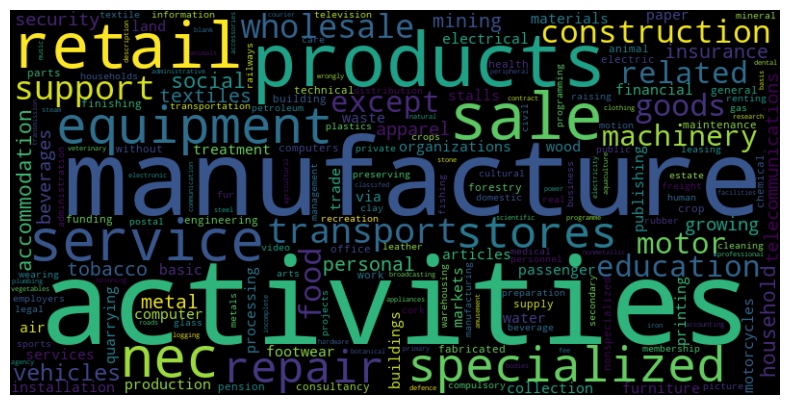

In [208]:
# Calculate word frequencies
all_tokens = [token for tokens_list in df_2['NICName'] for token in tokens_list]
freq_dist = FreqDist(all_tokens)

# Visualize word frequencies using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [209]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [210]:
# Create a sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Convert the list to a string
df_2['NICName_str'] = df_2['NICName'].apply(lambda x: ' '.join(map(str, x)))

# Apply sentiment analysis to the new string column
df_2['sentiment_score'] = df_2['NICName_str'].apply(lambda x: sia.polarity_scores(x)['compound'])
     

In [211]:
# Assuming you have already trained and saved the Word2Vec model
# Load the Word2Vec model
loaded_model = Word2Vec.load("word2vec_model")

# Check if 'workers' is in the vocabulary
word_to_check = 'grapes'

word_vector = loaded_model.wv[word_to_check]

# # Get the vocabulary of the model
# vocabulary = loaded_model.wv.key_to_index

# # Print the vocabulary
# print("Vocabulary:", vocabulary)

In [212]:
# Get the vocabulary of the Word2Vec model
vocabulary = loaded_model.wv.key_to_index

# Print the first 10 words in the vocabulary
print(list(vocabulary.keys())[:10])
     
['activities', 'manufacture', 'products', 'sale', 'retail', 'service', 'nec', 'equipment', 'specialized', 'stores']

['activities', 'manufacture', 'products', 'sale', 'retail', 'service', 'nec', 'equipment', 'specialized', 'stores']


['activities',
 'manufacture',
 'products',
 'sale',
 'retail',
 'service',
 'nec',
 'equipment',
 'specialized',
 'stores']

In [213]:
df_2.columns

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude', 'NICName_str',
       'sentiment_score'],
      dtype='object')

In [214]:
df2.to_csv("final_HR.csv", index = False)

In [215]:
model = pd.read_csv("C:/Users/HP/OneDrive/Desktop/xyz/All_combaine.csv")
model

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0000,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136
3,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173478,`21,`399,District - Malkangiri,`99,`000,`0000,Activities of extraterritorial organizations a...,574,315,259,...,38,1222,294,928,1176,286,890,46,8,38
173479,`21,`399,District - Malkangiri,`99,`991,`0000,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
173480,`21,`399,District - Malkangiri,`99,`991,`9910,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
173481,`21,`399,District - Malkangiri,`99,`992,`0000,Incomplete description/ Wrongly Classifed,139,49,90,...,16,636,92,544,618,88,530,18,4,14


In [216]:
model['India/States'].unique()

array(['STATE - ARUNACHAL PRADESH', 'District - Tawang',
       'District - West Kameng', 'District - East Kameng',
       'District - Papum Pare', 'District - Upper Subansiri',
       'District - West Siang', 'District - East Siang',
       'District - Upper Siang', 'District - Changlang',
       'District - Tirap', 'District - Lower Subansiri',
       'District - Kurung Kumey', 'District - Dibang Valley',
       'District - Lower Dibang Valley', 'District - Lohit',
       'District - Anjaw', 'STATE - MANIPUR', 'District - Senapati',
       'District - Tamenglong', 'District - Churachandpur',
       'District - Bishnupur', 'District - Thoubal',
       'District - Imphal West', 'District - Imphal East',
       'District - Ukhrul', 'District - Chandel', 'STATE - MIZORAM',
       'District - Mamit', 'District - Kolasib', 'District - Aizawl',
       'District - Champhai', 'District - Serchhip', 'District - Lunglei',
       'District - Lawngtlai', 'District - Saiha', 'STATE - WEST BENGAL',

## State Data

In [217]:
# State wise Districts datas

states_data = {
    'Rajasthan': ['Jalor', 'Sirohi', 'Banswara', 'Ganganagar', 'Ajmer', 'Pali', 'Bikaner', 'Tonk', 'Sikar', 'Kota', 'Jhunjhunun', 'Dhaulpur', 'Rajsamand', 'Bhilwara', 'Alwar', 'Chittaurgarh', 'Bundi', 'Hanumangarh', 'Nagaur', 'Udaipur', 'Jhalawar', 'SawaiMadhopur', 'Baran', 'Jaipur', 'Bharatpur', 'Barmer', 'Karauli', 'Churu', 'Dausa', 'Jaisalmer', 'Dungarpur', 'Jodhpur'],
    'Odisha': ['Rayagada', 'Jajapur', 'Anugul', 'Sambalpur', 'Dhenkanal', 'Kalahandi', 'Nuapada', 'Khordha', 'Debagarh', 'Sundargarh', 'Koraput', 'Kandhamal', 'Kendujhar', 'Mayurbhanj', 'Kendrapara', 'Malkangiri', 'Jagatsinghapur', 'Puri', 'Cuttack', 'Bargarh', 'Bhadrak', 'Nayagarh', 'Gajapati', 'Baudh', 'Jharsuguda', 'Ganjam', 'Baleshwar', 'Nabarangapur', 'Balangir', 'Subarnapur'],
    'Assam': ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 'Baksa', 'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropolitan', 'Lakhimpur', 'Karimganj', 'Hailakandi', 'Barpeta', 'Morigaon', 'Jorhat', 'Bongaigaon'],
    'Nagaland': ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 'Baksa', 'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropolitan', 'Lakhimpur', 'Karimganj', 'Hailakandi', 'Barpeta', 'Morigaon', 'Jorhat', 'Bongaigaon'],
    'Sikkim': ['SouthDistrict', 'EastDistrict', 'NorthDistrict', 'WestDistrict'],
    'Bihar': ['Gaya', 'Nalanda', 'Patna', 'Araria', 'Supaul', 'Saran', 'Madhubani', 'Katihar', 'Kishanganj', 'Gopalganj', 'Darbhanga', 'Bhagalpur', 'Bhojpur', 'Buxar', 'Nawada', 'Muzaffarpur', 'Samastipur', 'Sheohar', 'Purnia', 'Munger', 'Sitamarhi', 'Begusarai', 'Rohtas', 'Jamui', 'Banka', 'Saharsa', 'Madhepura', 'Arwal', 'PurbaChamparan', 'Jehanabad', 'Sheikhpura', 'Vaishali', 'Khagaria', 'Lakhisarai', 'PashchimChamparan', 'KaimurBhabua', 'Siwan'],
    'Uttar Pradesh': ['Baghpat', 'Mahoba', 'KanpurNagar', 'Jhansi', 'Sultanpur', 'Saharanpur', 'Faizabad', 'Balrampur', 'Budaun', 'Mau', 'Auraiya', 'Muzaffarnagar', 'Chandauli', 'Kushinagar', 'Lalitpur', 'Lucknow', 'Shrawasti', 'Kaushambi', 'Allahabad', 'Ballia', 'AmbedkarNagar', 'Mathura', 'Aligarh', 'SantRavidasNagarBhadohi', 'RaeBareli', 'Sonbhadra', 'Ghaziabad', 'Mainpuri', 'Pilibhit', 'Bijnor', 'Bahraich', 'Banda', 'Mirzapur', 'Meerut', 'Rampur', 'Chitrakoot', 'KanshiramNagar', 'Etawah', 'Kheri', 'Kannauj', 'Jaunpur', 'Unnao', 'GautamBuddhaNagar', 'Hardoi', 'Agra', 'Farrukhabad', 'BaraBanki', 'Siddharthnagar', 'JyotibaPhuleNagar', 'Moradabad', 'Mahrajganj', 'Sitapur', 'Fatehpur', 'Ghazipur', 'Azamgarh', 'Jalaun', 'Gonda', 'Firozabad', 'Varanasi', 'SantKabirNagar', 'MahamayaNagar', 'Bareilly', 'Shahjahanpur', 'Basti', 'Gorakhpur', 'KanpurDehat', 'Deoria', 'Bulandshahr', 'Etah'],
    'Uttarakhand': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Himachal Pradesh': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Puducherry': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'TamilNadu': ['Thoothukkudi', 'Karur', 'Namakkal', 'Dharmapuri', 'Nagapattinam', 'Thiruvarur', 'Ariyalur', 'Kancheepuram', 'Perambalur', 'Madurai', 'Coimbatore', 'Chennai', 'Kanniyakumari', 'Theni', 'Virudhunagar', 'Cuddalore', 'Salem', 'Dindigul', 'Ramanathapuram', 'Sivaganga', 'Tirunelveli', 'Erode', 'Viluppuram', 'Pudukkottai', 'Thanjavur', 'Thiruvallur', 'Tiruvannamalai', 'Krishnagiri', 'Tiruppur', 'Vellore', 'Tiruchirappalli', 'TheNilgiris'],
    'Kerala': ['Palakkad', 'Kannur', 'Kozhikode', 'Idukki', 'Thiruvananthapuram', 'Kasaragod', 'Kollam', 'Alappuzha', 'Thrissur', 'Ernakulam', 'Malappuram', 'Kottayam', 'Wayanad', 'Pathanamthitta'],
    'Goa': ['NorthGoa', 'SouthGoa'],
    'Karnataka': ['Kolar', 'DakshinaKannada', 'Yadgir', 'Chamarajanagar', 'Bijapur', 'Mandya', 'Udupi', 'Haveri', 'Davanagere', 'Hassan', 'Bangalore', 'Ramanagara', 'Chitradurga', 'Mysore', 'Dharwad', 'Shimoga', 'Koppal', 'Gulbarga', 'Bidar', 'Gadag', 'Kodagu', 'BangaloreRural', 'UttaraKannada', 'Raichur', 'Bagalkot', 'Belgaum', 'Bellary', 'Chikkaballapura', 'Chikmagalur', 'Tumkur'],
    'Maharashtra': ['Jalna', 'Kolhapur', 'Sindhudurg', 'Raigarh', 'Nanded', 'Washim', 'Gondiya', 'Gadchiroli', 'Dhule', 'Bid', 'Sangli', 'Wardha', 'Pune', 'Nagpur', 'Akola', 'Satara', 'Osmanabad', 'Yavatmal', 'Aurangabad', 'Ratnagiri', 'Parbhani', 'Latur', 'Nandurbar', 'Nashik', 'Mumbai', 'Solapur', 'Jalgaon', 'Ahmadnagar', 'Thane', 'Buldana', 'Amravati', 'Bhandara', 'MumbaiSuburban', 'Hingoli', 'Chandrapur'],
    'Gujarat': ['Rajkot', 'Ahmadabad', 'Navsari', 'Kheda', 'Patan', 'Tapi', 'Narmada', 'Porbandar', 'Anand', 'Vadodara', 'Surendranagar', 'Jamnagar', 'Kachchh', 'BanasKantha', 'SabarKantha', 'Dohad', 'TheDangs', 'Gandhinagar', 'Bhavnagar', 'Valsad', 'Amreli', 'Surat', 'PanchMahals', 'Junagadh', 'Bharuch', 'Mahesana'],
    'Jharkhand': ['Giridih', 'Khunti', 'Deoghar', 'Hazaribagh', 'Ramgarh', 'Lohardaga', 'PashchimiSinghbhum', 'Garhwa', 'Godda', 'Chatra', 'PurbiSinghbhum', 'Jamtara', 'Palamu', 'Latehar', 'Dhanbad', 'Sahibganj', 'Bokaro', 'Kodarma', 'SaraikelaKharsawan', 'Dumka', 'Gumla', 'Simdega', 'Ranchi', 'Pakur'],
    'Tripura': ['Dhalai', 'WestTripura', 'NorthTripura', 'SouthTripura'],
    'NCT of Delhi': ['Central', 'East', 'NewDelhi', 'North', 'West', 'NorthEast', 'SouthWest', 'South', 'NorthWest'],
    'West Bengal': ['Jalpaiguri', 'Hugli', 'Nadia', 'Haora', 'PaschimMedinipur', 'Kolkata', 'UttarDinajpur', 'Bankura', 'Murshidabad', 'NorthTwentyFourParganas', 'KochBihar', 'SouthTwentyFourParganas', 'PurbaMedinipur', 'Maldah', 'Darjiling', 'Puruliya', 'Birbhum', 'DakshinDinajpur', 'Barddhaman'],
    'Mizoram': ['Saiha', 'Aizawl', 'Kolasib', 'Mamit', 'Lunglei', 'Champhai', 'Lawngtlai', 'Serchhip'],
    'Manipur': ['ImphalEast', 'Ukhrul', 'Bishnupur', 'Senapati', 'ImphalWest', 'Chandel', 'Tamenglong', 'Churachandpur', 'Thoubal'],
    'Arunachal Pradesh': ['UpperSubansiri', 'DibangValley', 'Tirap', 'Anjaw', 'PapumPare', 'LowerDibangValley', 'WestSiang', 'Tawang', 'WestKameng', 'LowerSubansiri', 'KurungKumey', 'EastKameng', 'EastSiang', 'Lohit', 'Changlang', 'UpperSiang']
}

In [235]:

import re
district_list  = ['District - Ganganagar',
       'District - Hanumangarh', 'District - Bikaner', 'District - Churu',
       'District - Jhunjhunun', 'District - Alwar',
       'District - Bharatpur', 'District - Dhaulpur',
       'District - Karauli', 'District - Sawai Madhopur',
       'District - Dausa', 'District - Jaipur', 'District - Sikar',
       'District - Nagaur', 'District - Jodhpur', 'District - Jaisalmer',
       'District - Barmer', 'District - Jalor', 'District - Sirohi',
       'District - Pali', 'District - Ajmer', 'District - Tonk',
       'District - Bundi', 'District - Bhilwara', 'District - Rajsamand',
       'District - Dungarpur', 'District - Banswara',
       'District - Chittaurgarh', 'District - Kota', 'District - Baran',
       'District - Jhalawar', 'District - Udaipur',
       'District - Pratapgarh']
unique_districts = list(set([re.sub(r'[^a-zA-Z0-9]', '', district.split(" - ")[1]) for district in district_list]))

# Print the result without quotes
print(', '.join(unique_districts))
     


Jhunjhunun, Bhilwara, Pratapgarh, Hanumangarh, Chittaurgarh, Sikar, Alwar, Barmer, Bharatpur, Sirohi, Banswara, Churu, Jalor, Dhaulpur, Karauli, Jaisalmer, Udaipur, Jhalawar, Dausa, Jaipur, Nagaur, Dungarpur, Bundi, Ajmer, Jodhpur, Bikaner, Pali, Baran, Kota, Rajsamand, SawaiMadhopur, Tonk, Ganganagar


In [237]:
df_2.to_csv("final_HR.csv", index = False)
     

In [238]:
new_st = pd.read_csv("C:/Users/HP/OneDrive/Desktop/xyz/final_HR.csv")
new_st.head(2)

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude,NICName_str,sentiment_score
0,['total'],211353,160166,51187,114667,85612,29055,96686,74554,22132,...,ARUNACHAL,Tawang,249768,3.129037,249768,1,11.667026,92.735983,total,0.0
1,"['crop', 'animal', 'production', 'hunting', 'r...",12967,8180,4787,10821,6770,4051,2146,1410,736,...,ARUNACHAL,Tawang,15942,1.708795,15942,1,14.750429,78.570026,crop animal production hunting related service...,0.0


In [239]:

print(new_st.columns)

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude', 'NICName_str',
       'sentiment_score'],
      dtype='object')


In [240]:
unique_states = df_2['State'].unique()
unique_states

array(['ARUNACHAL', 'MANIPUR', 'MIZORAM', 'WEST', 'NCT', 'TRIPURA',
       'JHARKHAND', 'GUJARAT', 'MAHARASHTRA', 'KARNATAKA', 'GOA',
       'KERALA', 'TAMIL', 'PUDUCHERRY', 'HIMACHAL', 'UTTARAKHAND',
       'UTTAR', 'BIHAR', 'SIKKIM', 'NAGALAND', 'ASSAM', 'ODISHA'],
      dtype=object)